In [44]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from neuralNetworkFromScratch import NeuralNetworkFromScratch
from sklearn.metrics import mean_absolute_percentage_error

In [5]:
def min_max_scaler(series):
    normalized = (series - min(series)) / (max(series)-min(series))
    return normalized

# Example 1: Simple Linear Regression

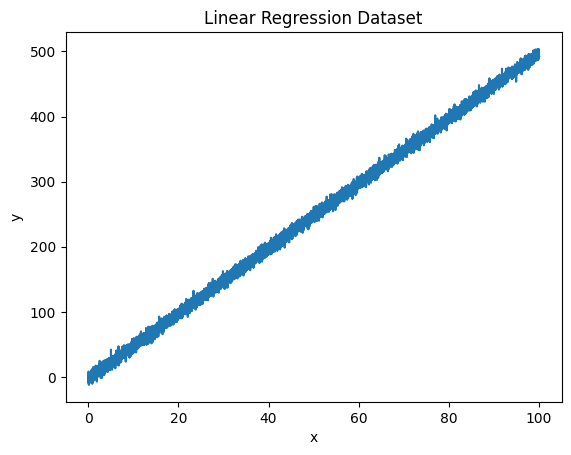

In [179]:
n_points = 10000
a=5
b=-3
alpha = 0.01

x1 = np.linspace(0,100,n_points)
y = a*x1+b

white_noise = np.random.randn(len(x))*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Dataset');

## 2. Preprocessing

In [163]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [164]:
# Train - Test Split
split_point = int(len(x) * 0.7)

# train_x = features[:split_point]
# test_x = features[split_point:]
# train_y = target[:split_point]
# test_y = target[split_point:]

train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)


## 3. Prediction

In [167]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=1e-5, num_iterations=10000, print_cost=True)

Cost after iteration 0: 203.00480450317164
Cost after iteration 1000: 3.9370106868602783
Cost after iteration 2000: 3.703501217027971
Cost after iteration 3000: 3.613803772623188
Cost after iteration 4000: 3.5700685410376716
Cost after iteration 5000: 3.5469841004398397
Cost after iteration 6000: 3.534440348365544
Cost after iteration 7000: 3.526021678239544
Cost after iteration 8000: 3.521865397045026
Cost after iteration 9000: 3.521371408407416
Cost after iteration 9999: 3.520894845289526


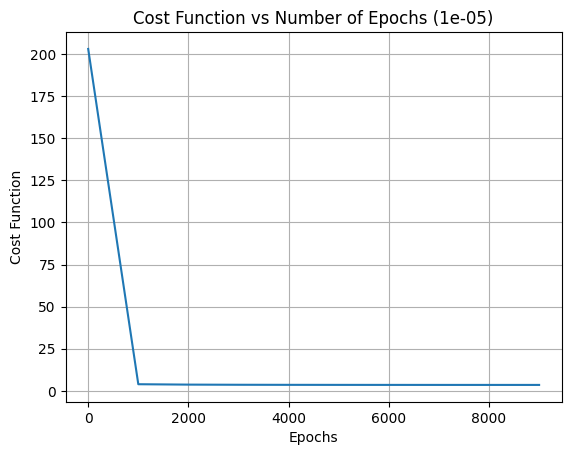

In [168]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, print_cost_function=True)

In [169]:
pred_train = model.predict(train_x, train_y)

RMSE: 3.5208943532759718


In [170]:
pred = model.predict(test_x, test_y)

RMSE: 3.5484230834873176


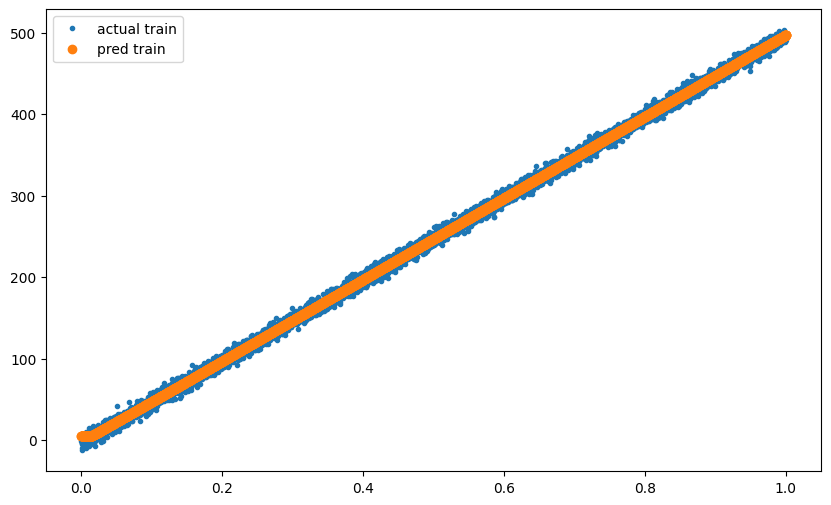

In [172]:
plt.figure(figsize=(10,6))
plt.plot(train_x, train_y, '.', label='actual train')
plt.plot(train_x, pred_train.reshape(-1,1), 'o', label='pred train')
plt.legend();

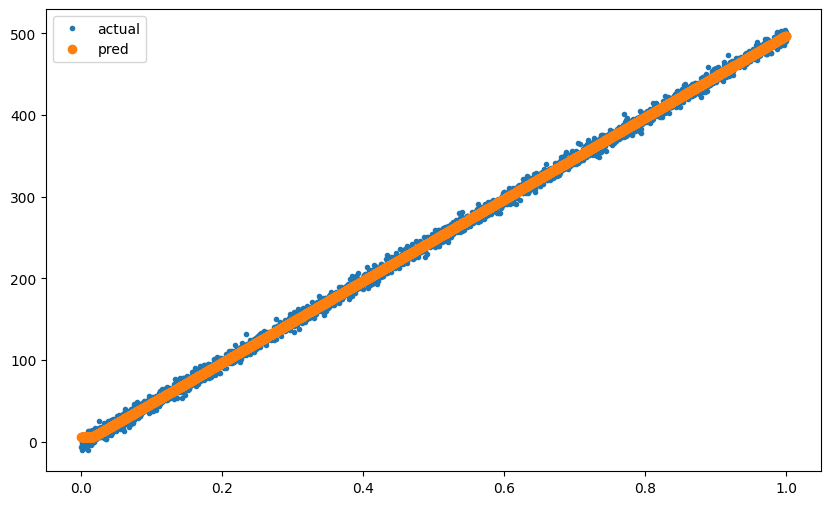

In [173]:
plt.figure(figsize=(10,6))
plt.plot(test_x, test_y, '.', label='actual')
plt.plot(test_x, pred.reshape(-1,1), 'o', label='pred')
plt.legend();

# Example 2: Multiple Linear Regression

## 1. Import Data

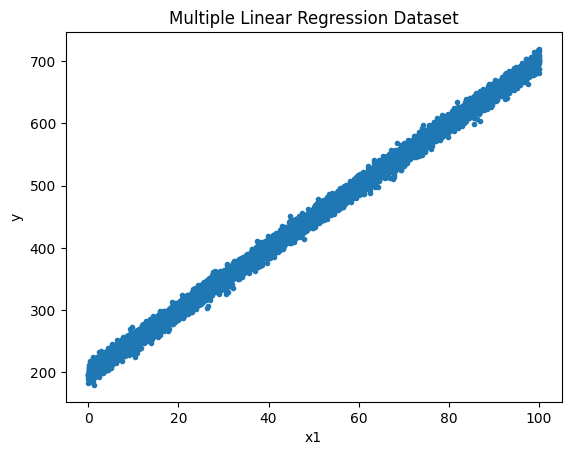

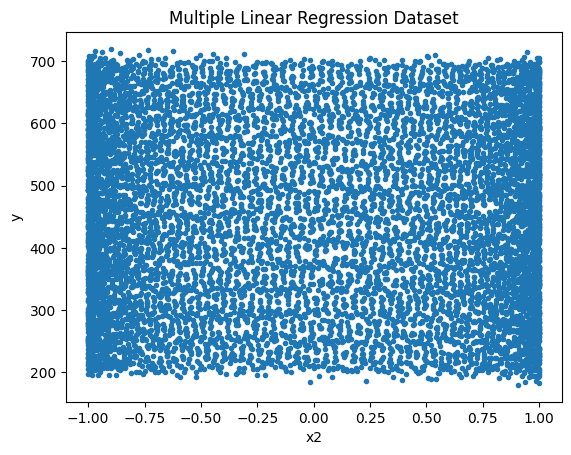

In [183]:
n_points = 10000
a=5
b=-3
c=200
alpha = 0.01

x1 = np.linspace(0,100,n_points)
x2 = np.sin(np.linspace(1250,10526,n_points))

y = a*x1+b*x2+c

white_noise = np.random.randn(len(x))*max(y)*alpha
y = y + white_noise

features = pd.DataFrame(data={'x1':x1, 'x2':x2})
target = pd.DataFrame(data={'y':y})
plt.plot(x1,y, '.')
plt.xlabel('x1')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset')

plt.figure()
plt.plot(x2,y, '.')
plt.xlabel('x2')
plt.ylabel('y')
plt.title('Multiple Linear Regression Dataset');

## 2. Preprocessing

In [52]:
# Train - Test Split
split_point = int(len(x) * 0.7)

train_x = features[:split_point]
test_x = features[split_point:]
train_y = target[:split_point]
test_y = target[split_point:]

# train_x = train_x.to_numpy().T
# test_x = test_x.to_numpy().T
# train_y = train_y.to_numpy().T
# test_y = test_y.to_numpy().T

In [56]:
for col in train_x.columns:
    train_x[col] = min_max_scaler(train_x[col])

# 3. Prediction

In [72]:
model = NeuralNetworkFromScratch(layers_dims=[train_x.shape[1], 8, 4, 3, 2, 1], cost_function='RMSE', learning_rate=1e-4, num_iterations=30000, print_cost=True)

Cost after iteration 0: 274.77236696070656
Cost after iteration 1000: 250.63037796069634
Cost after iteration 2000: 228.82725314106955
Cost after iteration 3000: 209.29226577743827
Cost after iteration 4000: 191.82305660398947
Cost after iteration 5000: 176.23608858329914
Cost after iteration 6000: 162.36442973977367
Cost after iteration 7000: 150.05568425052013
Cost after iteration 8000: 139.17007947938947
Cost after iteration 9000: 129.57872921313646
Cost after iteration 10000: 121.16210387972819
Cost after iteration 11000: 113.80874374517302
Cost after iteration 12000: 107.41424775429546
Cost after iteration 13000: 101.88055690632092
Cost after iteration 14000: 97.11552767024538
Cost after iteration 15000: 93.03276215763807
Cost after iteration 16000: 89.55163440785908
Cost after iteration 17000: 86.597433462531
Cost after iteration 18000: 84.10153889402122
Cost after iteration 19000: 82.00155393645544
Cost after iteration 20000: 80.24134195102852
Cost after iteration 21000: 78.7709

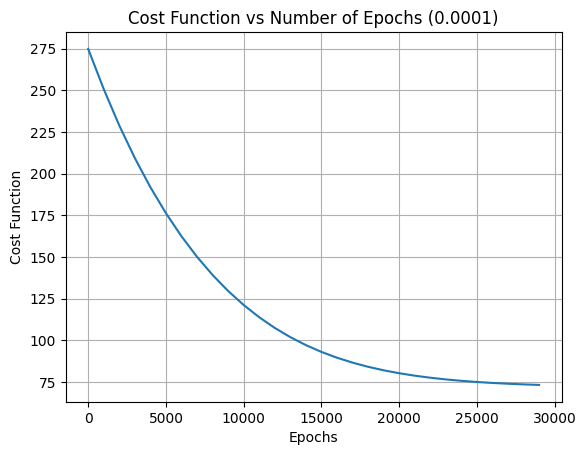

In [73]:
parameters, costs = model.fit(train_x, train_y, print_every=1000, print_cost_function=True)

In [74]:
pred_train = model.predict(train_x, train_y)

RMSE: 72.9616858448111


In [75]:
pred = model.predict(test_x, test_y)

RMSE: 192.24747760933826


# Example 2: Fetch California Housing Dataset

## 1. Import Data

In [ ]:
data = fetch_california_housing()
features = pd.DataFrame(data=data.data, columns=data.feature_names)
target = pd.DataFrame(data=data.target, columns=data.target_names)

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(features, target, test_size=0.33, random_state=42)

In [ ]:
for col in features.columns:
    features[col] = min_max_scaler(features[col])

In [ ]:
results = pd.DataFrame(data={'actual':test_y[0], 'pred':pred_test[0]})
results.plot(label=['actual', 'pred'])

mape = mean_absolute_percentage_error(test_y, pred_test)
mape